In [1]:
from plotting import load_results_df, get_metrics, plot_perf, plot_single_metric, create_corr_df
import re
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
sns.set()

perf_df, metrics_df = load_results_df(metric_sweep_names=[
    'h3vfn2jq', 'yqqueg03', 'fooseueo'], transfer_sweep_names=None)
metrics_df.to_csv('all_metrics.csv')
metrics = get_metrics(metrics_df)

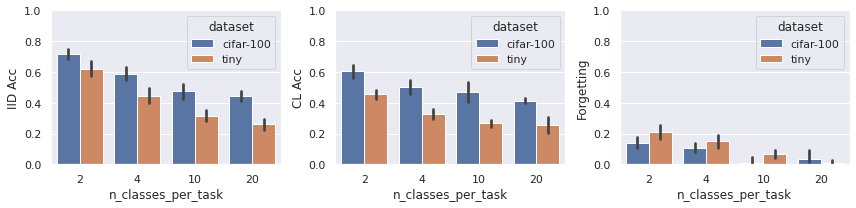

In [2]:
plot_perf(perf_df, hue='dataset', x='n_classes_per_task',
          figsize=(12, 3), savefig='../figures/perf.png', domain_inc=False, transfer=False)

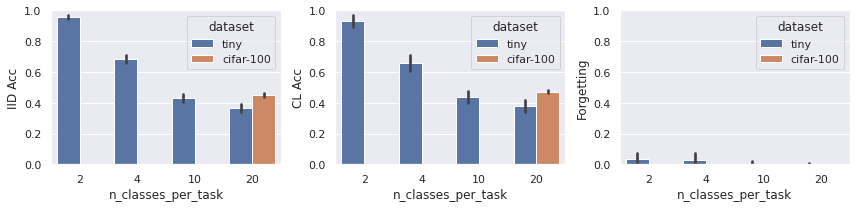

In [3]:
plot_perf(perf_df, hue='dataset', x='n_classes_per_task',
          figsize=(12, 3), savefig='../figures/perf.png', domain_inc=True, transfer=False)

In [ ]:
for m in metrics:
    metrics_df[m] = (metrics_df[m] - metrics_df[m].min()) / \
        (metrics_df[m].max() - metrics_df[m].min())
    # plot_single_metric(df=metrics_df, x=m, y='all_fgts', **dict(xlabel=m,
    #              ylabel='Forgetting'), savefig='../figures/fgt_scatter.png')
    # plot_single_metric(df=metrics_df, x=m, y='all_cl_accs', **dict(xlabel=m,
    #              ylabel='CL Accuracy'), savefig='../figures/acc_scatter.png')
    # plot_single_metric(df=metrics_df, x=m, y='all_transfers', **dict(xlabel=m, ylabel='Transfer'), savefig='../figures/transfer_scatter.png')


In [4]:
corr_df = create_corr_df(metrics_df.copy(), [m for m in metrics if 'diff' not in m and 'norm' not in m], idx=True, perf_metrics=['all_cl_accs', 'all_fgts'])
corr_df.to_csv('corr_df.csv')
corr_df = corr_df.groupby(
    ['model', 'dataset', 'domain_inc', 'perf_metric', 'sim_metric'], as_index=False).mean()
corr_df = corr_df.drop(labels=['n_classes_per_task', 'task_idx'], axis=1)


/home/mila/o/omar.salemohamed/.virtualenvs/tasksim/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mila/o/omar.salemohamed/.virtualenvs/tasksim/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/mila/o/omar.salemohamed/.virtualenvs/tasksim/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/mila/o/omar.salemohamed/.virtualenvs/tasksim/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/mila/o/omar.salemohamed/.virtualenvs/tasksim/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/

In [ ]:
for perf_metric in corr_df['perf_metric'].unique():
    for setting in corr_df['domain_inc'].unique():
        df = corr_df[(corr_df['perf_metric'] == perf_metric) & (corr_df['domain_inc'] == setting)]
        df = df.drop(['perf_metric', 'domain_inc'], axis=1)
        file_name = f'corr_{perf_metric}_{"domain_inc" if setting == True else "class_inc"}.tex'
        pd.pivot_table(df, values='corr_value', index=['model', 'dataset'],
                       columns=['sim_metric']).to_latex(buf=file_name, float_format="%.2f", multirow=True, multicolumn=True, bold_rows=True)
        
        

In [48]:
df = corr_df[(corr_df['domain_inc'] == True)]
# df = df.drop(['perf_metric', 'domain_inc'], axis=1)
# file_name = f'corr_{perf_metric}_{"domain_inc" if setting == True else "class_inc"}.tex'
df_style = pd.pivot_table(df, values='corr_value', index=['perf_metric', 'model', 'dataset'], columns=['sim_metric']).style
df_style = df_style.highlight_min(
    color='orange', axis=0).highlight_max(color='lightgreen', axis=0).format(precision=2)
df_style
# df_style.to_latex(buf='class_inc_corr.tex', hrules=True, convert_css=True)



In [34]:
df_style.rename(index={'max_logit_ratio': 'logit_ratio'})

sim_metric                      all_sims  entropy_ratio  final_sims    kl_div  \
perf_metric model    dataset                                                    
all_cl_accs densenet cifar-100 -0.122214      -0.122901   -0.156114  0.312231   
                     tiny      -0.173121      -0.188007   -0.087323  0.580462   
            resnet   cifar-100 -0.200374       0.060953   -0.097099  0.285528   
                     tiny       0.003953      -0.282394   -0.086747  0.020164   
all_fgts    densenet cifar-100 -0.076087      -0.132386    0.058762  0.086151   
                     tiny       0.090510      -0.053098   -0.225231  0.172924   
            resnet   cifar-100 -0.034561      -0.357449    0.067761 -0.186505   
                     tiny       0.087593      -0.274063    0.086962  0.150642   

sim_metric                      max_logit_ratio  max_prob_ratio  \
perf_metric model    dataset                                      
all_cl_accs densenet cifar-100        -0.007716        0.009735   
                     tiny              0.319414        0.067404   
            resnet   cifar-100        -0.134974       -0.152894   
                     tiny              0.274975        0.205453   
all_fgts    densenet cifar-100         0.030667        0.069490   
                     tiny              0.115234        0.204547   
            resnet   cifar-100         0.337789        0.280251   
                     tiny              0.083979        0.073839   

sim_metric                      prototypes_sim  subspace_overlap  \
perf_metric model    dataset                                       
all_cl_accs densenet cifar-100       -0.037640         -0.040339   
                     tiny            -0.318517         -0.357895   
            resnet   cifar-100       -0.360768         -0.225064   
                     tiny            -0.200950         -0.326572   
all_fgts    densenet cifar-100       -0.155196         -0.225191   
                     tiny            -0.058422         -0.162939   
            resnet   cifar-100       -0.083173          0.069066   
                     tiny            -0.039207         -0.066035   

sim_metric                      trace_overlap  wass_dist  
perf_metric model    dataset                              
all_cl_accs densenet cifar-100      -0.137700   0.149655  
                     tiny           -0.398082   0.134722  
            resnet   cifar-100      -0.120125   0.077048  
                     tiny           -0.300129  -0.089413  
all_fgts    densenet cifar-100      -0.067967  -0.210840  
                     tiny           -0.094823   0.014854  
            resnet   cifar-100      -0.198209  -0.055021  
                     tiny           -0.073917   0.264839